머신러닝 개념
학습 방법에 따른 분류: 1)지도(컴퓨터에게 문제와 정답을 계속 넘겨서 학습시킴) 2)비지도(문제만 넘김) 3)강화
해결 문제영역에 따른 분류: 분류,회귀(수치), 군집 ... 



강화학습: 매순간 잘했다 못해다하는 보상을 주어 학습함 



Open AI GYM이라는 FW에 이미 만들어진 환경(Environment)을 사용하여 실습해 보겠습니다.   
 
첫번째 환경(Environment) 은 Frozen Lake Game 입니다.  S에서 시작,  H는(Hole) 여기에 빠지면 감점. 목표는 G(goal)에 가는 것입니다.   게임의 전체 환경을 볼 수 있다면 다음과 같습니다.   
 
 

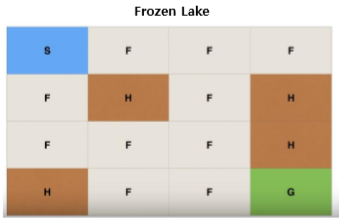

In [2]:
from IPython.display import Image
Image ("C:/Users/user/Pictures/frozen_lake.png")

Agent는 Action을 취할수 있고 이에 따라 상태를 전달받고 (state) 보상을 받기도한다(reward)


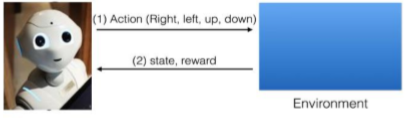

In [3]:
Image ("C:/Users/user/Pictures/reinforce1.png")

처음에는 각 테이블의 각 구간의 점수가 없기때문에 0으로 채워져있음 
→ 랜덤하게 움직임 
→ 우연히 S14에 닿아 goal 에 이르른 경우 reward를 1 받게됨(게임이 Goal에 이르르는 성공을 하였을 경우 reward를 받는 게임이므로) 
→ S14는 goal과 맞닿아있는 방향에 1을 얻게되고(reward + max Q(s,a): 다음상태의 Q테이블의 최댓값 = reward:1 + max 15(s,a):0)  
→ S10도 S14에 갈수있는 아랫쪽 방향에, S13은 오른쪽에 (게임에서 얻은 reward + 새상태의 max값) 을 얻게됨 
→ and so on..


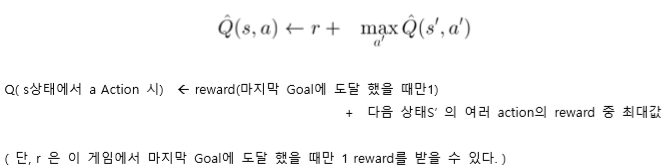

In [4]:
Image ("C:/Users/user/Pictures/frozenlake.png")

Gym 을 이용한 게임
Gym 을 이용한 게임의 기본틀


import gym
evn = gym.make (“Taxi-v1”)
observation = env.reset()

for_in range(1000):
	env.render()
	action = env.action_space.sample()


Q table만들기
Q [16,4] : 전체 배열이 16개, 각 한 칸에 4개의 점수구간이 있음 

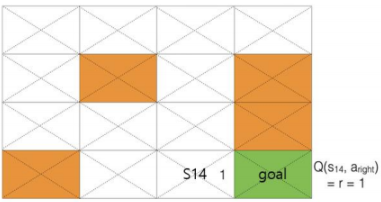

In [5]:
Image ("C:/Users/user/Pictures/action1.png")  

## Q-learning

첫번째 액션 정의 action = rargmax(Q[state, :]) cf: Q[0,:] 0번째 (start 지점, state 몇번째 상태인지 predefined number) 행의 모든 열 (start 칸의 모든 네 개의 칸)에서의 최댓값

    
이후 액션 정의 Q[state, action] = reward + np.max (Q[new_state. :]

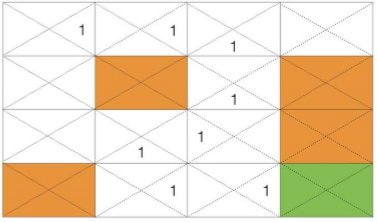

In [7]:
Image ("C:/Users/user/Pictures/action2.png")  

단점: 길이 한번 생기고 나면 그 길로만 가고 모험을 하지않는다 → 최적이 아닐 수 있음


⇒ 1) E-greedy: 10% 확률로 random, 90% 아는 길로  
2)decaying E-greedy


## Discounted reward

goal과 맞닿아있는 방향에 reward 1을 얻게되고(reward + max Q(s,a): 다음상태의 Q테이블의 최댓값 = reward:1 + discounted_rate * max Q(s,a):0)  

S10은 S14에 갈수있는 아랫쪽 방향에 reward가 주어지는데, 이때 S14의 reward가 미래의 reward이기때문에 discount한다. discount_rate가 0.9인 경우0.9 * S14의 최댓값(1) = 0.9가 S10의 아랫쪽 reward가 된다 

→ and so on..  

cf. 식에서 r은 이 그 게임이 끝나고 나서 얻을 수 있는 reward를 말한다.


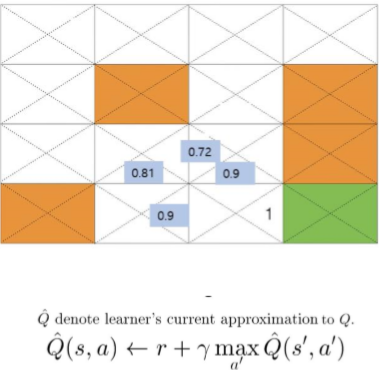

In [9]:
Image ("C:/Users/user/Pictures/discountedreward.png")  

## Nondeterministic

‘is_slippery’ : True 강화학습을 해야하는 환경은 slippery 한 환경이 많다. 

slippery를 True로 주게되면 action이 한칸씩 안일어나기도 하고, 한칸만 가야할 것이 두 칸가기도하고 오른쪽으로 가야할 것이 왼쪽으로 가기도한다 → 정확도가 매우 떨어지게됨



solution?

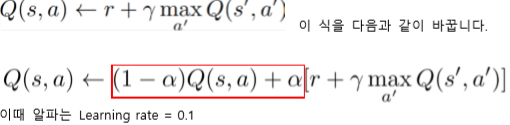

In [10]:
Image ("C:/Users/user/Pictures/nondeterministic.png") 


이 때 알파는 Q를 얼마나 믿을 것인지 %, (learning rate)

Q를 100% 믿지않는다. 내가 알고있는 것의 일부분과 Q의 일부를 조합하여 갱신